<a href="https://colab.research.google.com/github/011akm/MovieMind-project/blob/main/Moviemind.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  DATA GATERING AND UNDERSTANDING*


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

import warnings
warnings.filterwarnings("ignore")


In [6]:
df = pd.read_csv('IMDb Movies India.csv',encoding='ISO-8859-1')
df.shape    #shows dimension of data in form of rows and columns
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [7]:
#get information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [8]:
# get summary statistics of the datset
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


# **DATA PREPRATION**


In [14]:
#Checking if there any missing value in data
df.isna().sum()

,0
Name,0
Year,0
Duration,2068
Genre,0
Rating,0
Votes,0
Director,5
Actor 1,125
Actor 2,200
Actor 3,292


In [15]:
#droppig the row where rating value is missing
df.dropna(subset=['Rating'], inplace=True)
df.isnull().sum()

,0
Name,0
Year,0
Duration,2068
Genre,0
Rating,0
Votes,0
Director,5
Actor 1,125
Actor 2,200
Actor 3,292


In [17]:
#filling missing value in Genre with unknown
df['Genre'].fillna('Unknown', inplace=True)
df.isna().sum()

,0
Name,0
Year,0
Duration,2068
Genre,0
Rating,0
Votes,0
Director,5
Actor 1,125
Actor 2,200
Actor 3,292


In [18]:
# Extract numeric values from 'Duration' and convert to integers
df['Duration'] = df['Duration'].str.extract(r'(\d+)').astype(float)

# Impute missing values in 'Duration' with the median
df['Duration'].fillna(df['Duration'].median(), inplace=True)

In [20]:
df.dropna(subset=['Actor 1', 'Actor 2', 'Actor 3'], inplace=True)
df.isna().sum()

,0
Name,0
Year,0
Duration,0
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


In [21]:
#Checking for duplicate
df.duplicated().sum()

np.int64(0)

In [27]:
#Changing data types of year and votes to numeric datatypes
df['Year'] = df['Year'].astype(str).str.extract(r'(\d+)').astype(int)
df['Votes'] = df['Votes'].astype(str).str.extract(r'(\d+)').astype(int)
df.dtypes

,0
Name,object
Year,int64
Duration,float64
Genre,object
Rating,float64
Votes,int64
Director,object
Actor 1,object
Actor 2,object
Actor 3,object


# **REMOVING OUTLIERS AND DETECTING ANAMOLIES**

In [29]:
df.sample(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
3059,Chintu Ka Birthday,2020,80.0,"Drama, War",7.8,4,Devanshu Singh,Satyanshu Singh,Vinay Pathak,Tillotama Shome
7905,Kuku Mathur Ki Jhand Ho Gayi,2014,109.0,"Comedy, Romance",5.3,243,Aman Sachdeva,Siddharth Gupta,Simran Kaur Mundi,Siddharth Bhardwaj
5287,Gunahon Ka Devta,1990,149.0,Action,5.1,16,Kawal Sharma,Mithun Chakraborty,Sangeeta Bijlani,Aditya Pancholi
10968,Pratha,2002,134.0,"Action, Drama, Thriller",6.2,34,Raja Bundela,Deepak Bandhu,Irrfan Khan,Ashney Shroff
7502,Khan kluay,2006,79.0,"Animation, Adventure, Family",5.9,1,Kompin Kemgumnird,Tod Polson,Akshay Kumar,Anyarit Pitakkul


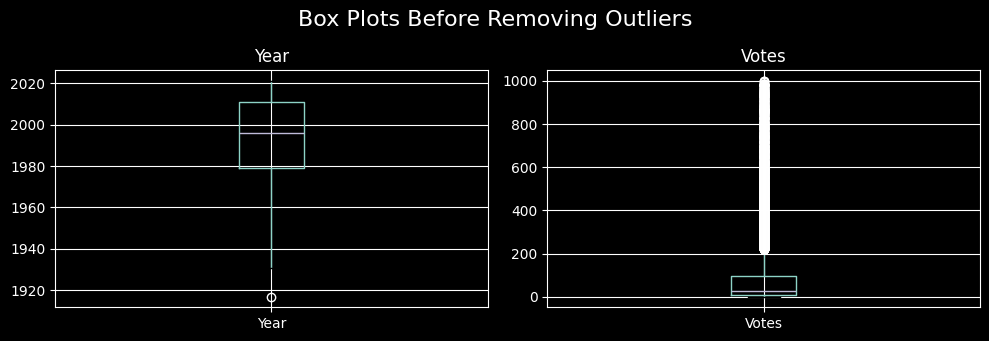

Number of rows with outliers before removal: 781


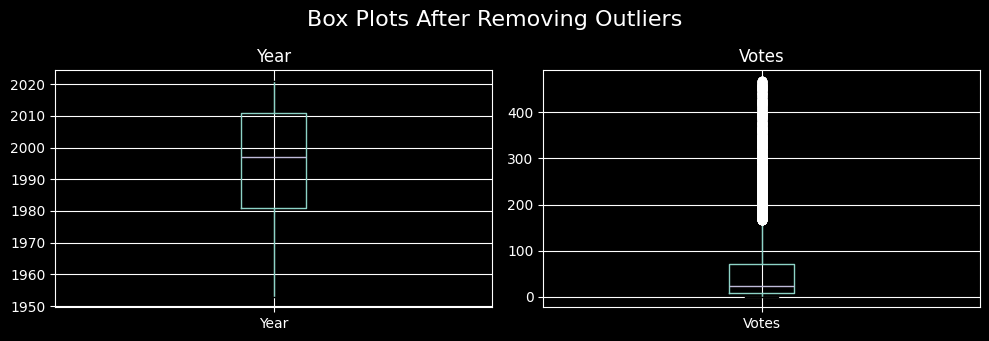

Number of rows after removing outliers: 6846


In [28]:
# Set the dark_background style
plt.style.use('dark_background')

# Define the numerical columns you want to check for outliers
numerical_columns = ['Year', 'Votes']

# Create box plots before removing outliers
plt.figure(figsize=(10, 6))
plt.suptitle('Box Plots Before Removing Outliers', fontsize=16)

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    df.boxplot(column=[column])
    plt.title(f'{column}')

plt.tight_layout()
plt.show()

# Calculate z-scores for numerical columns
z_scores = pd.DataFrame()
for column in numerical_columns:
    z_scores[column] = (df[column] - df[column].mean()) / df[column].std()

# Set a z-score threshold to identify outliers (e.g., 2 or -2 for a 95% confidence interval)
z_score_threshold = 2

# Identify outliers based on z-scores
outliers = z_scores[(z_scores.abs() > z_score_threshold).any(axis=1)]

# Display the number of rows with outliers before removal
print("Number of rows with outliers before removal:", len(outliers))

# Remove outliers and create a new DataFrame (df_cleaned)
df = df[~((z_scores.abs() > z_score_threshold).any(axis=1))]

# Create box plots after removing outliers
plt.figure(figsize=(10, 6))
plt.suptitle('Box Plots After Removing Outliers', fontsize=16)

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    df.boxplot(column=[column])
    plt.title(f'{column}')

plt.tight_layout()
plt.show()

# Display the number of rows after removing outliers
print("Number of rows after removing outliers:", len(df))

# DATA TRANSFORMATION

In [32]:

X = df.drop('Rating', axis=1)
y = df['Rating']
X.head()

,Name,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110.0,"Comedy, Romance",35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
6,...Yahaan,2005,142.0,"Drama, Romance, War",1,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82.0,"Horror, Mystery, Thriller",326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,2014,116.0,"Action, Crime, Thriller",11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


ONEHOT ENCODING

In [36]:
# Specify the categorical columns to be one-hot encoded
categorical_columns = ['Name', 'Genre', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3']

# Initialize the OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)

# Fit and transform the categorical columns
X_categorical_encoded = ohe.fit_transform(X[categorical_columns])

# Retrieve feature names for the encoded columns
feature_names = []
for i, col in enumerate(categorical_columns):
    categories = ohe.categories_[i]
    for category in categories:
        feature_names.append(f"{col}_{category}")

# Create a DataFrame for the encoded features
X_categorical_encoded_df = pd.DataFrame(X_categorical_encoded, columns=feature_names)
X_categorical_encoded_df.head()

,Name_#Gadhvi (He thought he was Gandhi),Name_#Yaaram,Name_'Ferry',Name_'Sambandh',Name_...Yahaan,Name_102 Not Out,Name_10ml LOVE,Name_12 O'Clock,Name_127 B,Name_13B: Fear Has a New Address,...,Actor 3_Zareen Khan,Actor 3_Zarina Wahab,Actor 3_Zarine Ali,Actor 3_Zayed Khan,Actor 3_Zeenat Aman,Actor 3_Zeeshan Khan,Actor 3_Zeishan Quadri,Actor 3_Zenobia Shroff,Actor 3_Zoya Hussain,Actor 3_Zulfi Sayed
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


SCALING NUMERICAL FEATURES

In [37]:
# Specify the numerical columns to be scaled
numerical_columns = ['Year', 'Duration', 'Votes']

# Initialize the StandardScaler
scaler = MinMaxScaler()

# Fit and transform the selected numerical columns
X_numeric_scaled = scaler.fit_transform(X[numerical_columns])

# Create a DataFrame for the scaled features
X_numeric_scaled_df = pd.DataFrame(X_numeric_scaled, columns=numerical_columns)
X_numeric_scaled_df.head()

,Year,Duration,Votes
0,0.970588,0.293333,0.015021
1,0.970588,0.296667,0.072961
2,0.764706,0.403333,0.000000
3,0.867647,0.203333,0.697425
4,0.897059,0.316667,0.021459


In [38]:
# combine the scaled columns and onehotencoded columns
X_final = pd.concat([X_numeric_scaled_df, X_categorical_encoded_df, ], axis=1)
X_final.head()

,Year,Duration,Votes,Name_#Gadhvi (He thought he was Gandhi),Name_#Yaaram,Name_'Ferry',Name_'Sambandh',Name_...Yahaan,Name_102 Not Out,Name_10ml LOVE,...,Actor 3_Zareen Khan,Actor 3_Zarina Wahab,Actor 3_Zarine Ali,Actor 3_Zayed Khan,Actor 3_Zeenat Aman,Actor 3_Zeeshan Khan,Actor 3_Zeishan Quadri,Actor 3_Zenobia Shroff,Actor 3_Zoya Hussain,Actor 3_Zulfi Sayed
0,0.970588,0.293333,0.015021,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.970588,0.296667,0.072961,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.764706,0.403333,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.867647,0.203333,0.697425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.897059,0.316667,0.021459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


SCALING IN Y

In [39]:
# Instantiate StandardScaler
scaler = MinMaxScaler()

# Reshape 'Rating' to a 2D array for StandardScaler
y_scaled = scaler.fit_transform(df['Rating'].values.reshape(-1, 1))

# Convert 'y_scaled' back to a DataFrame
y = pd.DataFrame(y_scaled, columns=['Rating'])
y

,Rating
0,0.662921
1,0.370787
2,0.707865
3,0.505618
4,0.325843
...,...
6841,0.426966
6842,0.471910
6843,0.528090
6844,0.393258


# **INITIAL VISUALS OF INSIGHT**

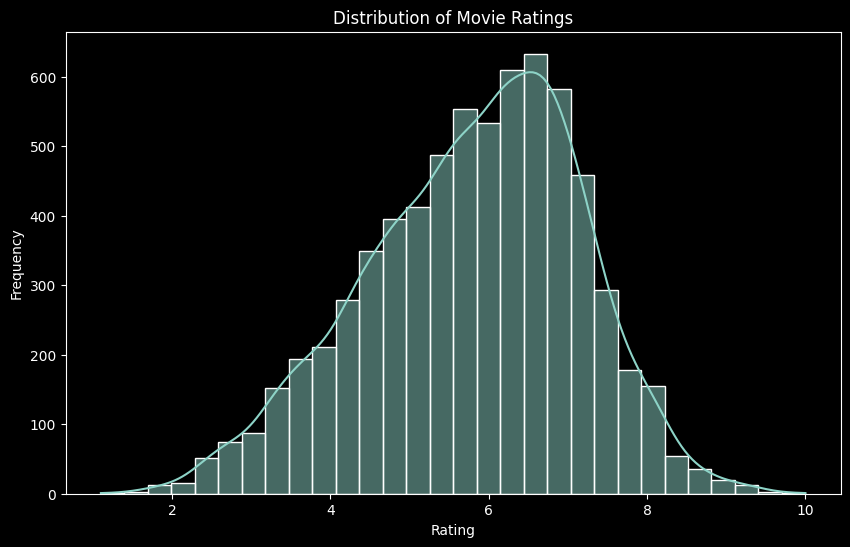

In [40]:
# rating analysis
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Rating', bins=30, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

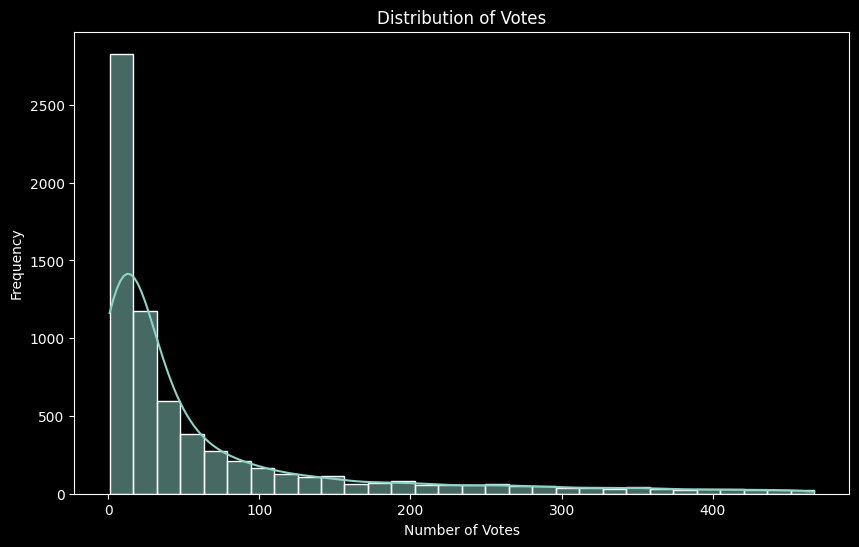

In [41]:
# Votes Analysis
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Votes', bins=30, kde=True)
plt.title('Distribution of Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Frequency')
plt.show()